In [1]:
import pickle
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as snst
from tslearn.datasets import UCR_UEA_datasets
import tensorflow as tf 

2022-12-21 12:12:31.786293: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-21 12:12:32.203021: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-21 12:12:32.203076: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-21 12:12:34.827037: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

# Parameters

In [2]:
dataset='Coffee'

# Load Data

In [3]:
train_x,train_y, test_x, test_y=UCR_UEA_datasets().load_dataset(dataset)


# Model Training

In [4]:
import tensorflow as tf 


#model = Classifier_CNN(f'./ClassificationModels/models/{dataset}', (train_x.shape[1], train_x.shape[2]), train_y.shape[-1], True)
#y_true = np.argmax(test_y, axis=1)
#model.fit(train_x,train_y,test_x,test_y)

model_to_explain = tf.keras.models.load_model(f'../../ClassificationModels/models/{dataset}/cnn/last_model.hdf5')

2022-12-21 12:12:38.554899: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-21 12:12:38.554957: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-21 12:12:38.555007: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jacqueline-ThinkPad-P53): /proc/driver/nvidia/version does not exist
2022-12-21 12:12:38.555582: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Explanation Algo

In [5]:
from TSInterpret.InterpretabilityModels.Saliency.TSR import TSR
int_mod=TSR(model_to_explain, train_x.shape[-2],train_x.shape[-1], method='IG',mode='time')

Mode in TF Saliency time


In [6]:
print(np.array([test_x[0,:,:]]).shape)

(1, 286, 1)


In [7]:
item= np.array([test_x[0,:,:]])
label=int(np.argmax(test_y[0]))


In [8]:
exp=int_mod.explain(item,labels=label,TSR =True)

# Plot Item 

time mode


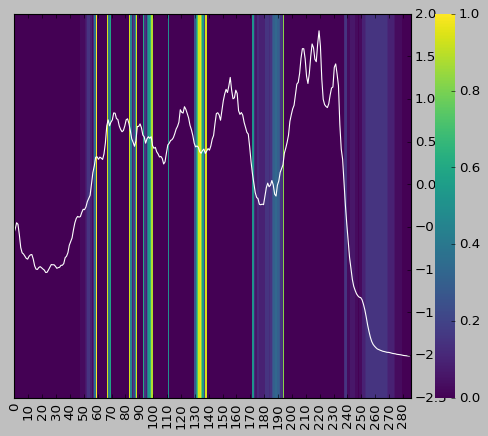

In [9]:
%matplotlib inline  
int_mod.plot(np.array([test_x[0,:,:]]),exp)

time mode


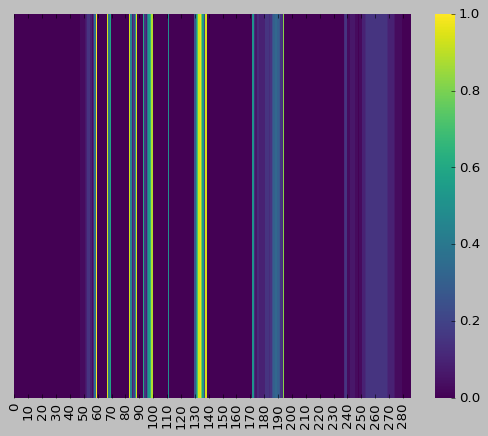

In [10]:
%matplotlib inline  
int_mod.plot(np.array([test_x[0,:,:]]),exp, heatmap = True)